## Đồ án 1 - Color Compression <a class="anchor" id="c2"></a>

### Nội dung đồ án <a class="anchor" id="c21"></a>

#### Giới thiệu

Một bức ảnh có thể lưu trữ dưới ma trận của các điểm ảnh. Có nhiều loại ảnh được sử dụng trong thực tế, ví dụ: ảnh xám, ảnh màu,... 

Đối với ảnh xám, một điểm ảnh sẽ là được biểu diễn bằng giá trị không âm. 

Ví dụ ta có thể dùng ma trận này:
$$\begin{bmatrix}
255 & 0 & 0  & 0  & 255 \\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 0  & 0  & 255
\end{bmatrix}$$

có thể biểu diễn cho ảnh xám có nội dung như sau:

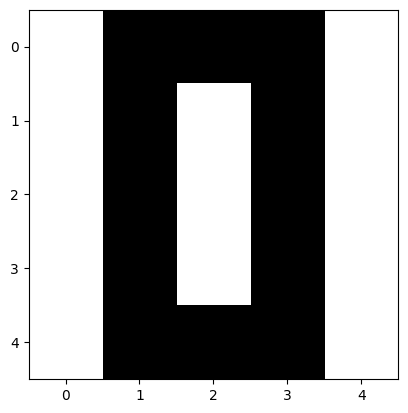

In [36]:
import matplotlib.pyplot as plt
plt.imshow(np.array([[255, 0, 0, 0, 255], 
                     [255, 0, 255, 0, 255], 
                     [255, 0, 255, 0, 255], 
                     [255, 0, 255, 0, 255], 
                     [255, 0, 0, 0, 255]]), cmap='gray', vmin=0, vmax=255);

Ảnh màu được sử dụng phổ biến là ảnh RGB, trong đó, mỗi điểm ảnh sẽ lưu trữ 3 thông tin kênh màu (mỗi kênh màu 1 byte) là: R (red - đỏ), G (green - xanh lá), B (blue - xanh dương). Ta có thể sử dụng ma trận:
```
                    [[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]
```
để biểu diễn cho ảnh màu có nội dung sau:

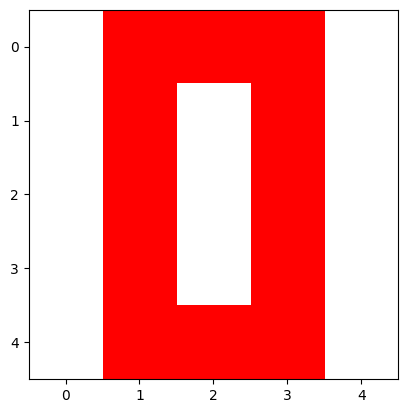

In [37]:
plt.imshow(np.array([[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]));

Như vậy, số màu trong ảnh RGB có thể là $256^3 \approx 1.7 \times 10^7$. Với số lượng màu khá lớn, khi lưu trữ ảnh có thể sẽ tốn chi phí lưu trữ. Do đó bài toán đặt ra là giảm số lượng màu để biểu diễn ảnh sao cho nội dung ảnh được bảo toàn nhất có thể.

Cho ảnh như sau:

![img](https://i.ibb.co/NxrJ06N/project01-img.png)

Trong ví dụ trên, số lượng màu cho ảnh ban đầu là 145856 màu. Sau khi giảm số lượng màu xuống còn 7, ảnh không còn được chi tiết nhưng cơ bản vẫn bảo toàn nội dung của ảnh ban đầu.

Nguồn ảnh: Photo by Smileus on Getty Images·

Để thực hiện giảm số lượng màu, ta cần tìm ra các đại diện có thể thay thế cho một nhóm màu. Cụ thể trong trường hợp ảnh RGB, ta cần thực hiện gom nhóm các pixel $(\mathbb{R}^3)$ và chọn ra đại diện cho từng nhóm. Như vậy, bài toán trên trở thành gom nhóm các vec-tơ.

#### Yêu cầu

Trong đồ án này, bạn được yêu cầu cài đặt chương trình giảm số lượng màu cho ảnh sử dụng thuật toán [K-Means](https://en.wikipedia.org/wiki/K-means_clustering).

Cụ thể:
- Sử dụng ngôn ngữ lập trình Python
- Cài đặt các hàm yêu cầu trong tập tin Jupyter Notebook `MSSV.ipynb` được đính kèm:
    - Đọc ảnh
    - Hiển thị ảnh
    - Lưu ảnh
    - Chuyển đổi ảnh từ kích thước 2D (height, width, channels) sang 1D (height $\times$ width, channels)
    - Gom nhóm màu sử dụng K-Means
    - Tạo ảnh mới từ các màu trung tâm (từ K-Means)
    - Hàm main: 
        - Cho phép nhập vào tên tập tin ảnh mỗi lần chương trình thực thi (gợi ý sử dụng `input()` trong Python)
        - Cho phép lưu ảnh với tối thiểu 2 định dạng là pdf và png
- Các thư viện được phép sử dụng:
    - `NumPy` (tính toán ma trận)
    - `PIL` (đọc, ghi ảnh)
    - `matplotlib` (hiển thị ảnh)

<font style="color:red">*Lưu ý: Không sử dụng K-Means đã được cài đặt sẵn trong các thư viện trong bài nộp. Sinh viên có thể sử dụng K-Means trong `scikit-learn` ĐỂ KIỂM TRA (và xóa đi trước khi nộp bài).* </font>


### Quy định bài nộp <a class="anchor" id="c22"></a>

- Thực hiện toàn bộ bài làm trên 1 tập tin Jupyter Notebook (.ipynb)


- Bạn nộp tập tin `MSSV.zip` được nén từ thư mục MSSV chứa các tập tin sau:
    1. Báo cáo toàn bộ bài làm: `MSSV.pdf`
    2. Mã nguồn: `MSSV.ipynb`


- Trong đó, nội dung tập tin báo cáo gồm có:
    - Thông tin cá nhân: Họ và tên, MSSV, lớp
    - Ý tưởng thực hiện, mô tả các hàm
    - Hình ảnh kết quả với từng số lượng màu, `k = {3, 5, 7}`. Sinh viên có thể thử nghiệm thêm `k` khác
    - **Nhận xét kết quả trên**
    - Báo cáo cần có số trang và tài liệu tham khảo
    
- Ví dụ minh họa cây thư mục bài nộp sau khi giải nén tập tin `MSSV.zip` như sau:
    ```
    MSSV
    ├── MSSV.pdf
    └── MSSV.ipynb
    ```

### Quy định chấm bài <a class="anchor" id="c23"></a>

Đồ án chiếm **10%** tổng điểm môn học.

Những trường hợp sau đây sẽ bị 0 điểm toàn bộ đồ án:
- Nộp sai quy định
- Không nộp báo cáo
- Thực thi mã nguồn báo lỗi

<font style="color:red">**LƯU Ý: CÁC BÀI LÀM GIỐNG NHAU (BÁO CÁO HOẶC MÃ NGUỒN) SẼ NHẬN 0 ĐIỂM TOÀN BỘ PHẦN THỰC HÀNH**</font>